In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.custom_datasets import DelightClassic, DelightAutoLabeling

In [2]:
df = pd.read_csv("..\data\SERSIC\delight_sersic.csv", dtype={'objID': 'Int64'})
images_multi = np.load("..\data\SERSIC\h2f_ps1_multires_delight_simple_method.npy")

sn_pos = df[["dx","dy"]].values.astype(np.float32)
sersic_radius = df["rSerRadius"].values.astype(np.float32)
sersic_ab = df["rSerAb"].values.astype(np.float32)
sersic_phi = df["rSerPhi"].values.astype(np.float32)

oid_train = np.load(f"..\data\SERSIC\id_train.npy",allow_pickle=True) # Escogemos las oids para entrenar, ya sea del split de Delight 
idx_train = df[df['oid'].isin(oid_train)].index.to_numpy()

X_train_autolabeling = np.load("..\data\SERSIC\X_train_autolabeling.npy")
X_train_multi = images_multi[idx_train]
y_train = sn_pos[idx_train]

mask_radius_10 = (df["rSerRadius"].values[idx_train] < 9.8)

df_train = df.iloc[idx_train][mask_radius_10]
X_train_autolabeling = X_train_autolabeling[mask_radius_10]
X_train_multi = X_train_multi[mask_radius_10]

y_train = y_train[mask_radius_10]

train_sersic_radius = sersic_radius[idx_train][mask_radius_10]
train_sersic_ab = sersic_ab[idx_train][mask_radius_10]
train_sersic_phi = sersic_phi[idx_train][mask_radius_10]


### Auto-Labeling

In [3]:
dataset_autolabeling =  DelightAutoLabeling(
                                imgs = X_train_autolabeling,
                                sn_pos = None,
                                sersic_radius = train_sersic_radius,
                                sersic_ab = train_sersic_ab,
                                sersic_phi = train_sersic_phi
                                )

In [4]:
transformations = {0: "Original",
                   1: "Rotation 90°",
                   2: "Rotation 180°",
                   3: "Rotation 270°",
                   4: "Horizontal Flip",
                   5: "Horizontal Flip + Rotation 90°",
                   6: "Horizontal Flip + Rotation 180°",
                   7: "Horizontal Flip + Rotation 270°",
                   }

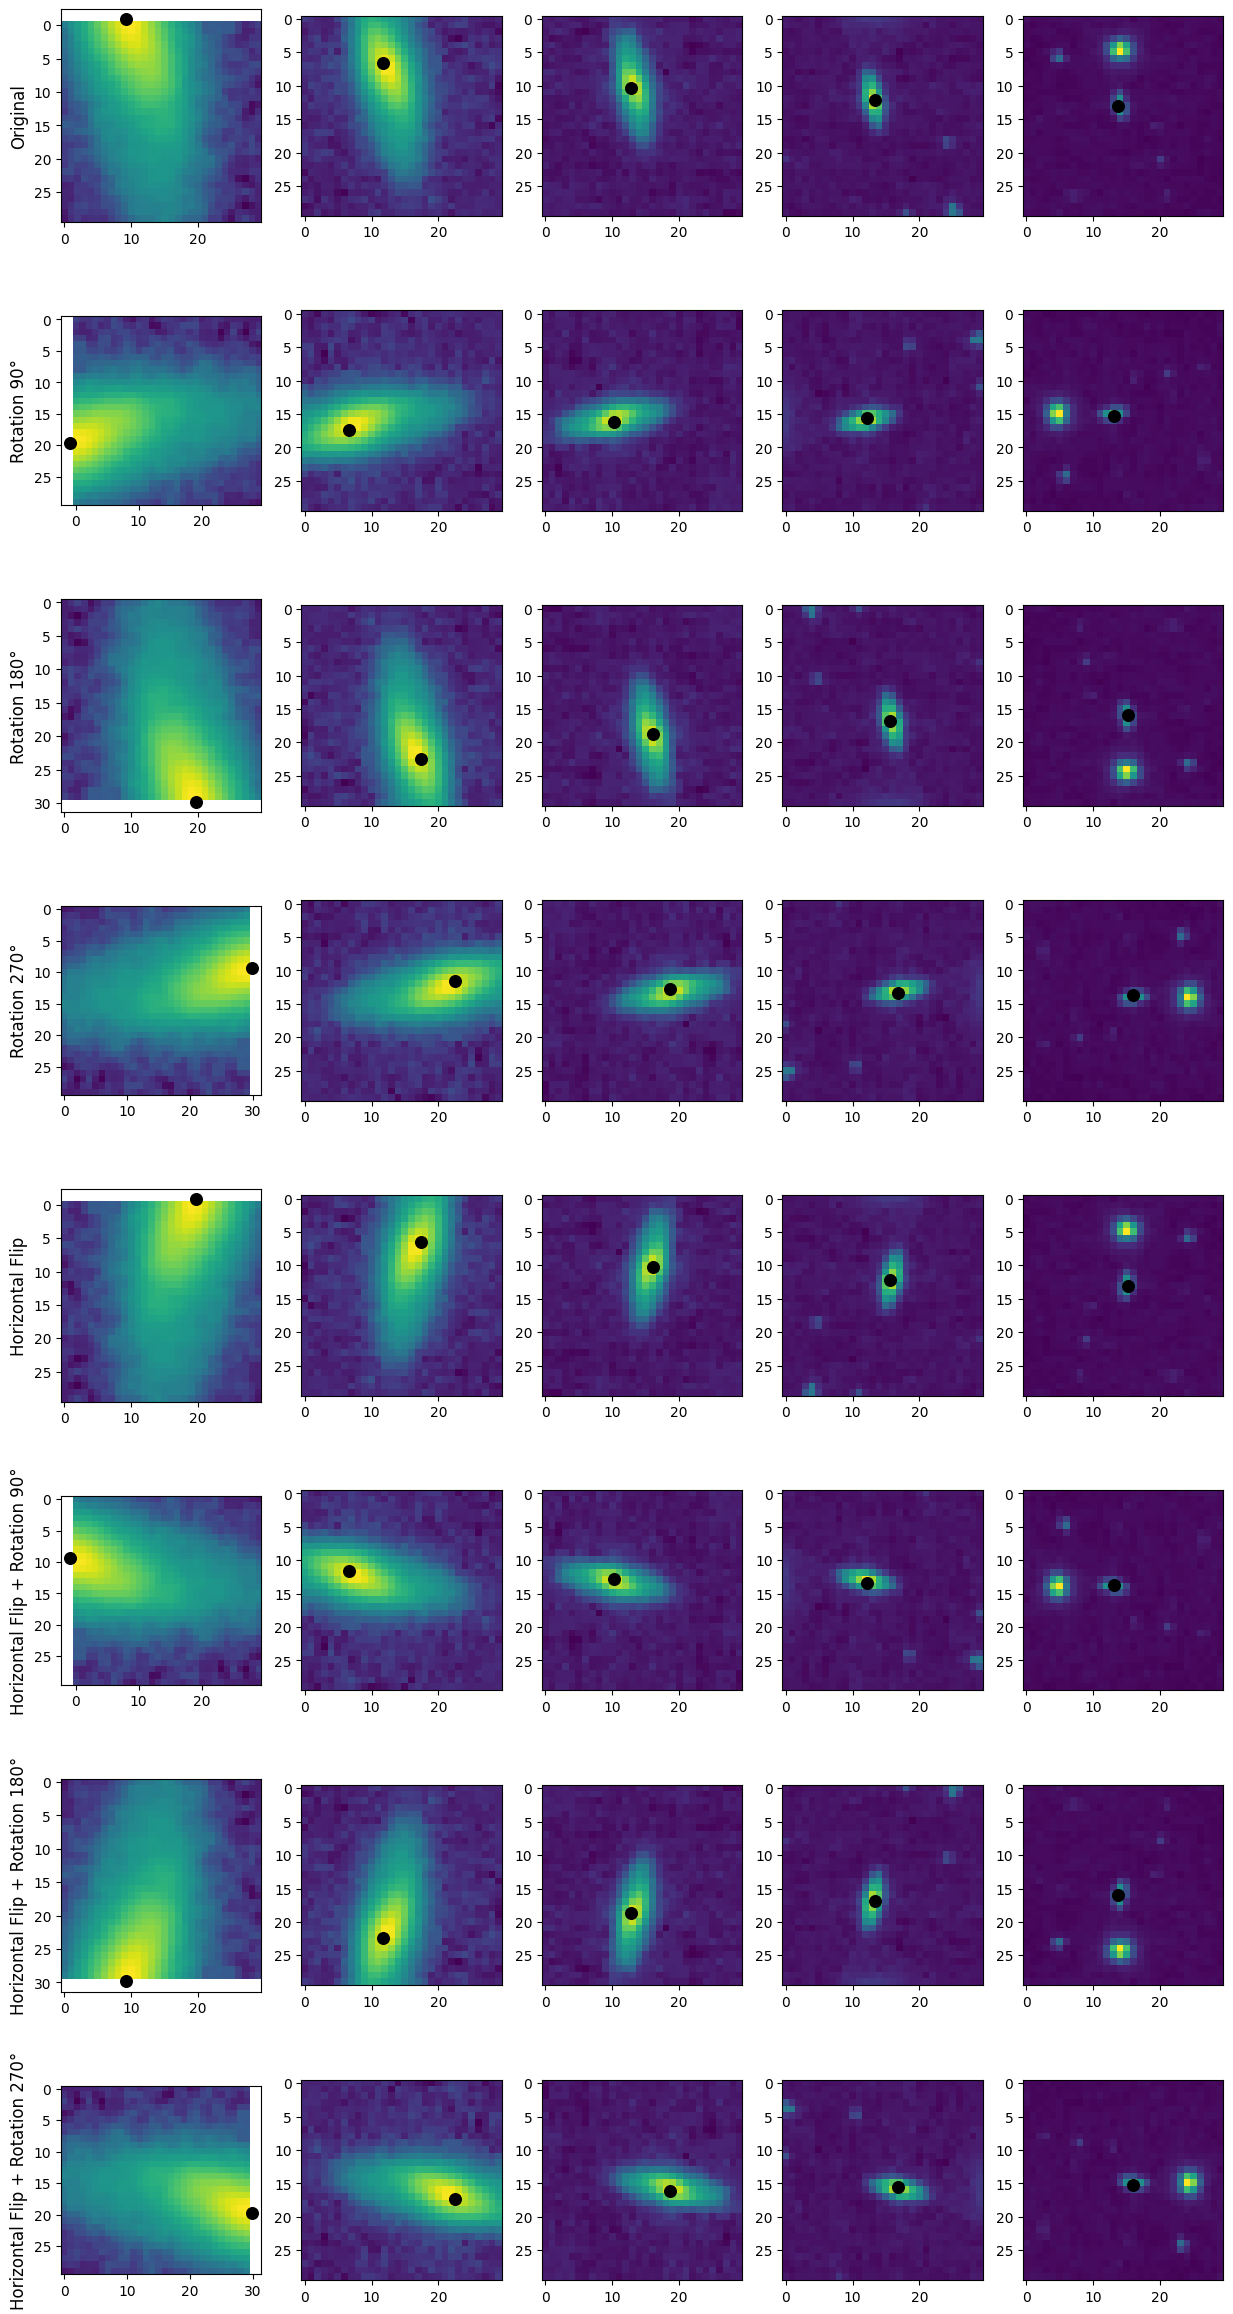

In [6]:
idx = 17
example = dataset_autolabeling[idx]

centros = np.array([[14,14],[14,15],[15,15],[15,14],[15,14],[14,14],[14,15],[15,15]])
fig, axs = plt.subplots(8,5, figsize=(15,30))

for i, (pos, trans_name) in enumerate(transformations.items()):
    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][0])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) + centros[i][0]) , (example[1][pos][1]/(2**m)+ centros[i][1]), s=70, color="black")

    axs[pos][0].set_ylabel(trans_name, fontsize=12)  # título a la izquierda

plt.show()

### Delight

In [19]:
dataset_delight_h2f =  DelightClassic(
                                imgs = X_train_multi,
                                sn_pos = y_train)

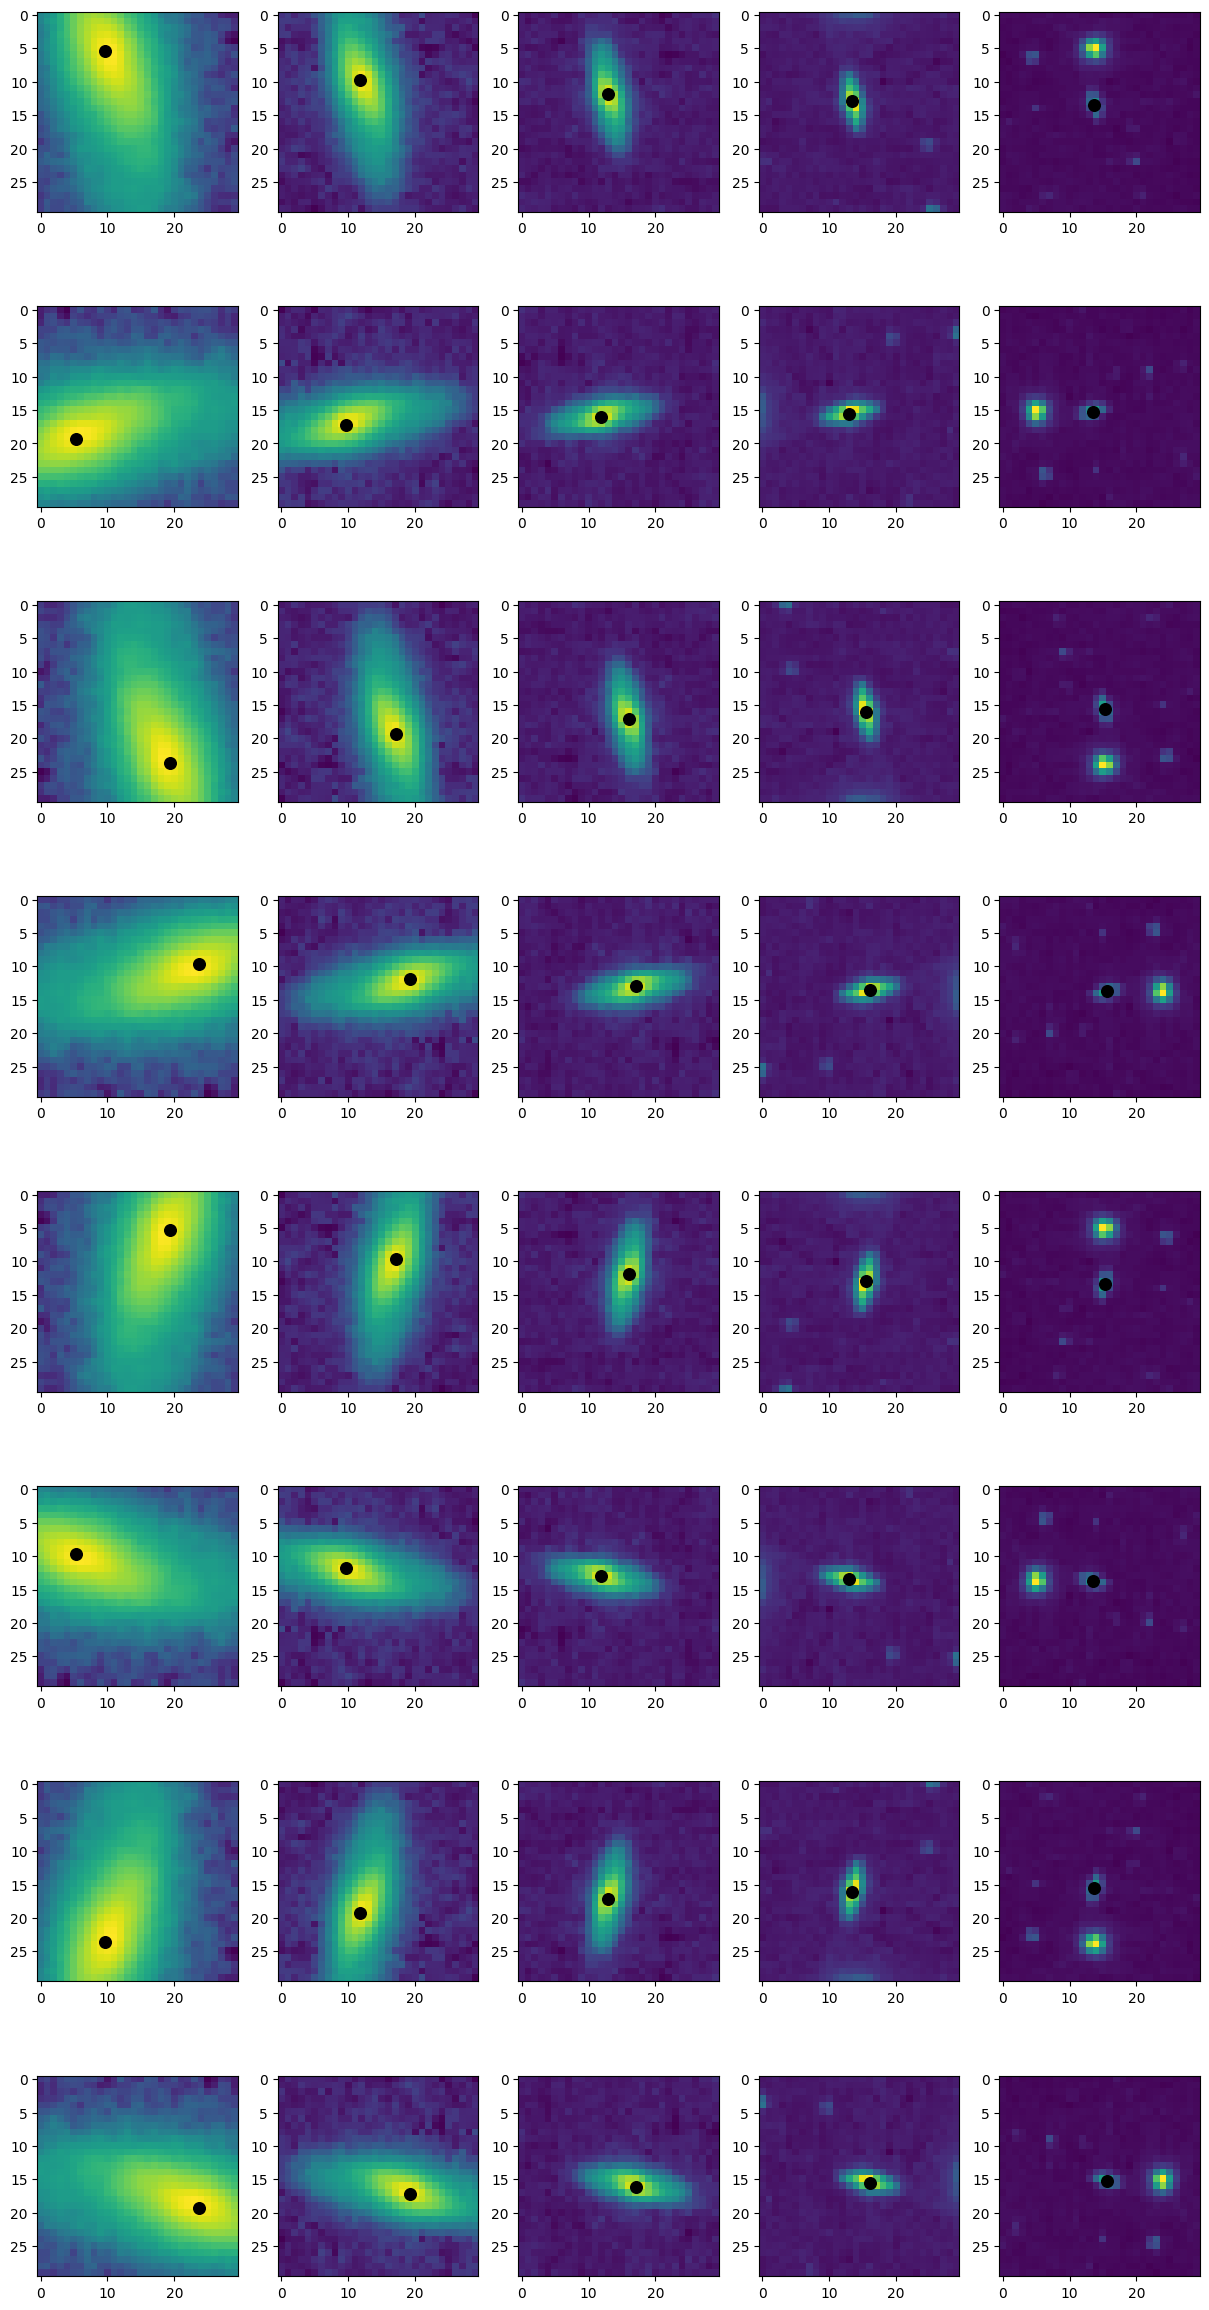

In [ ]:
idx = 17

example = dataset_delight_h2f[idx]
centros = np.array([[14,14],[14,15],[15,15],[15,14],[15,14],[14,14],[14,15],[15,15]])

pos = 0
fig, axs = plt.subplots(8,5, figsize=(15,30))

for i, (pos, trans_name) in enumerate(transformations.items()):

    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][0])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) + centros[i][0]) , (example[1][pos][1]/(2**m)+ centros[i][1]), s=70, color="black")

plt.show()

### Re-center on DELIGHT SN

In [3]:
dataset_recenter_delight =  DelightAutoLabeling(
                                        imgs = X_train_autolabeling,
                                        sn_pos = y_train,
                                        sersic_radius = None,
                                        sersic_ab = None,
                                        sersic_phi = None)

In [4]:
dataset_delight_h2f =  DelightClassic(
                                imgs = X_train_multi,
                                sn_pos = y_train)

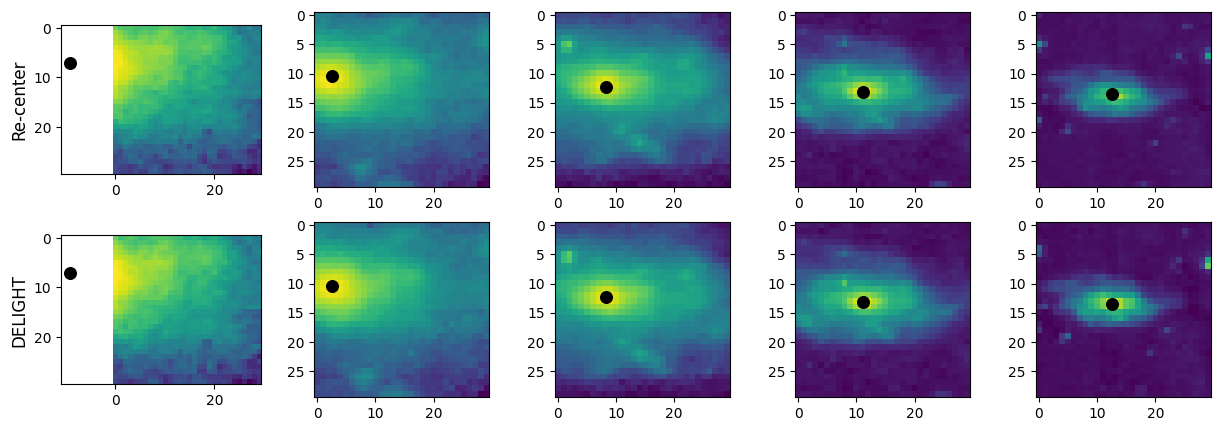

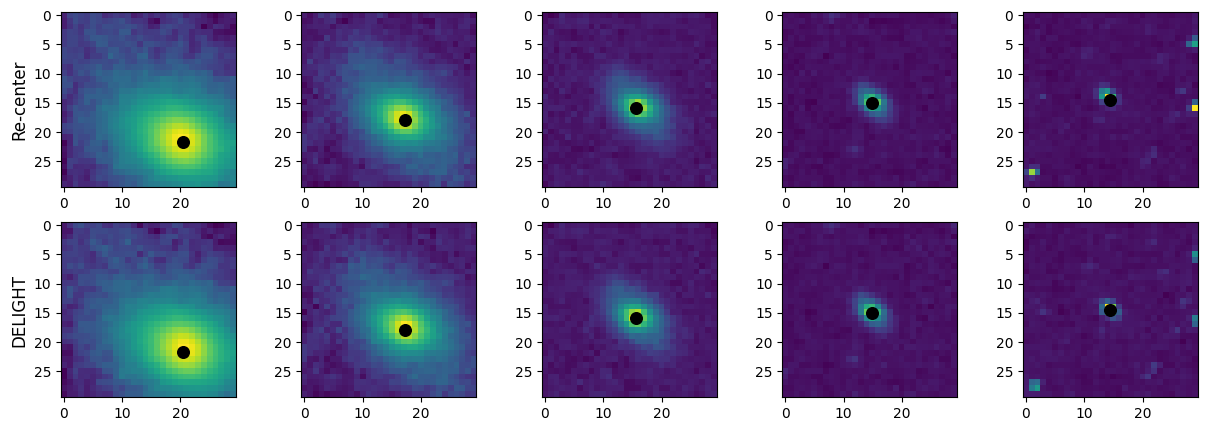

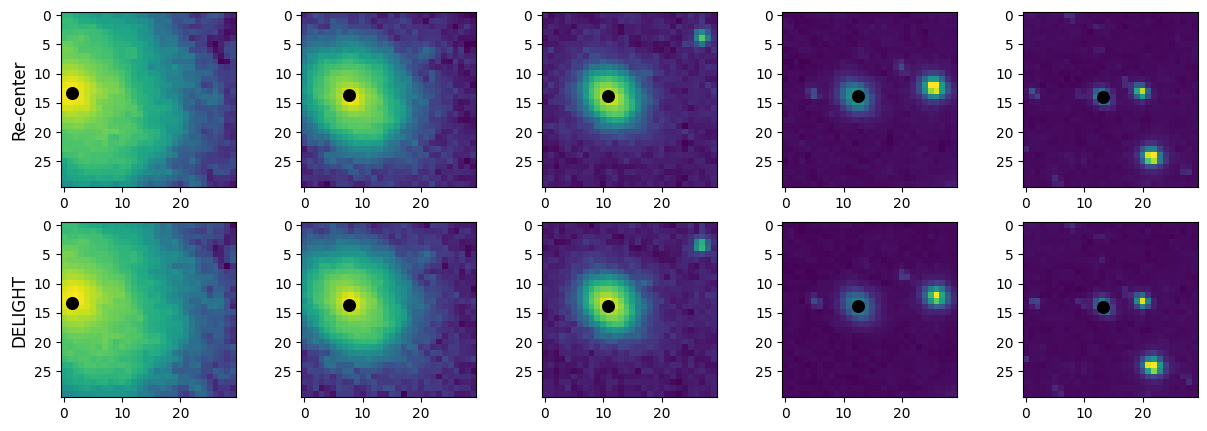

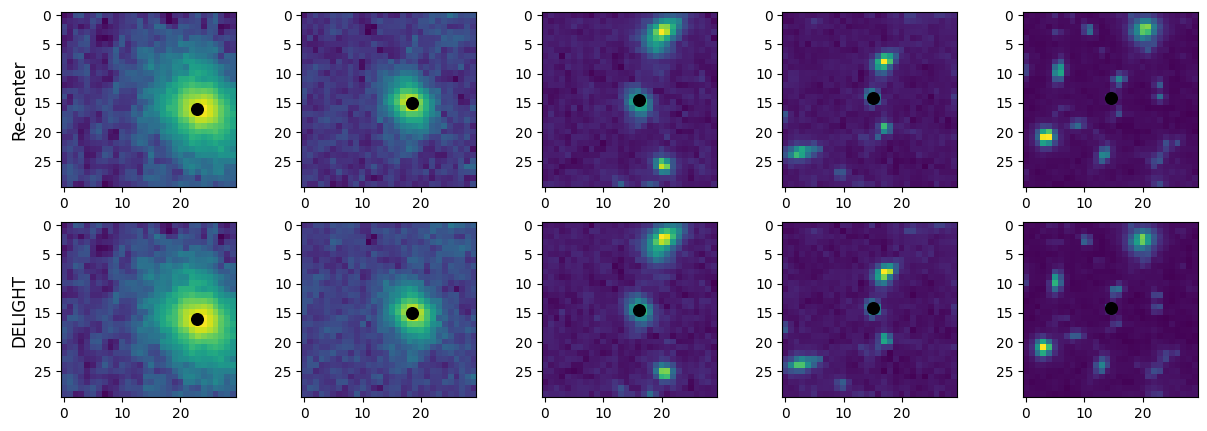

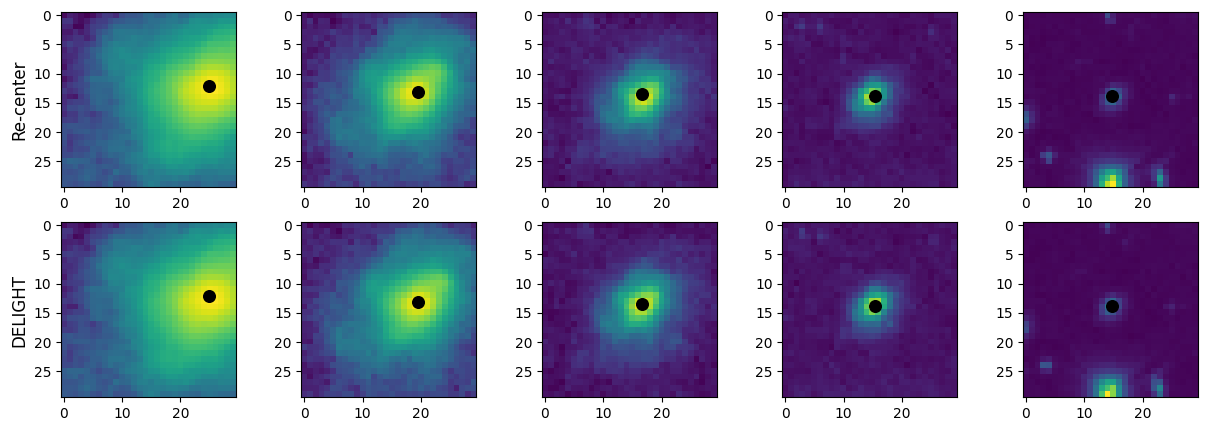

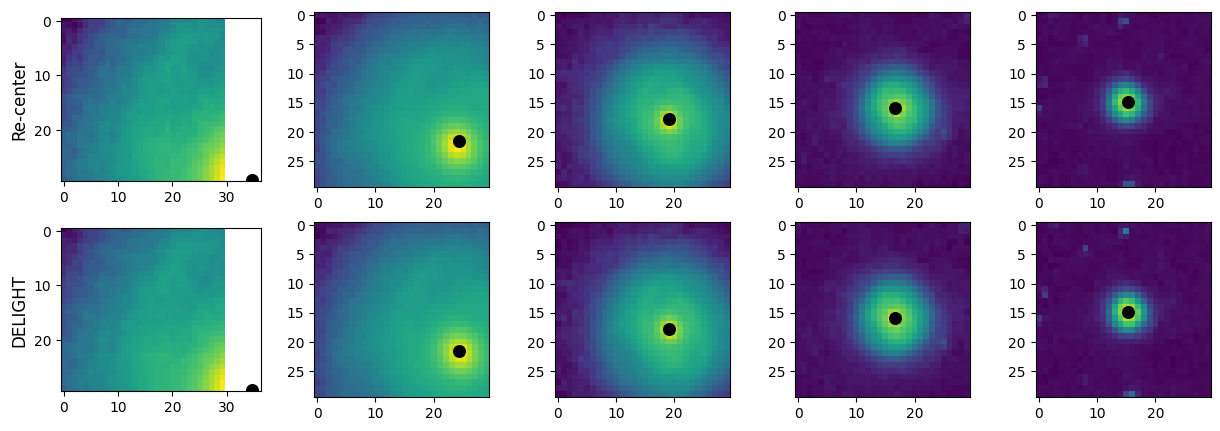

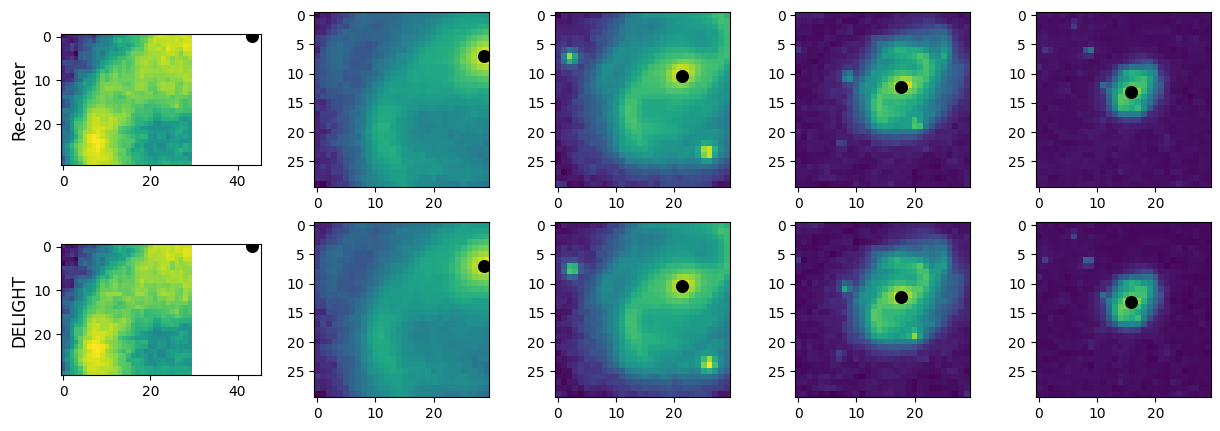

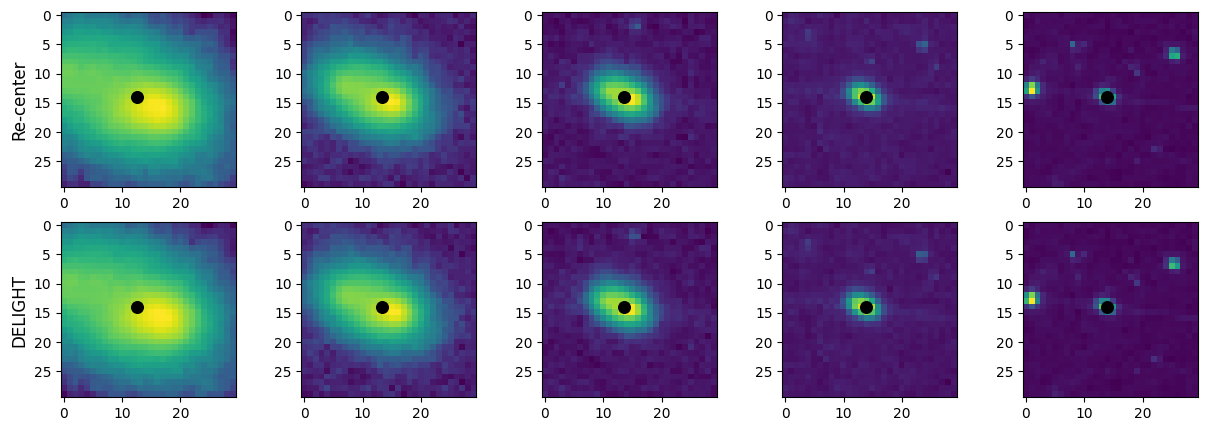

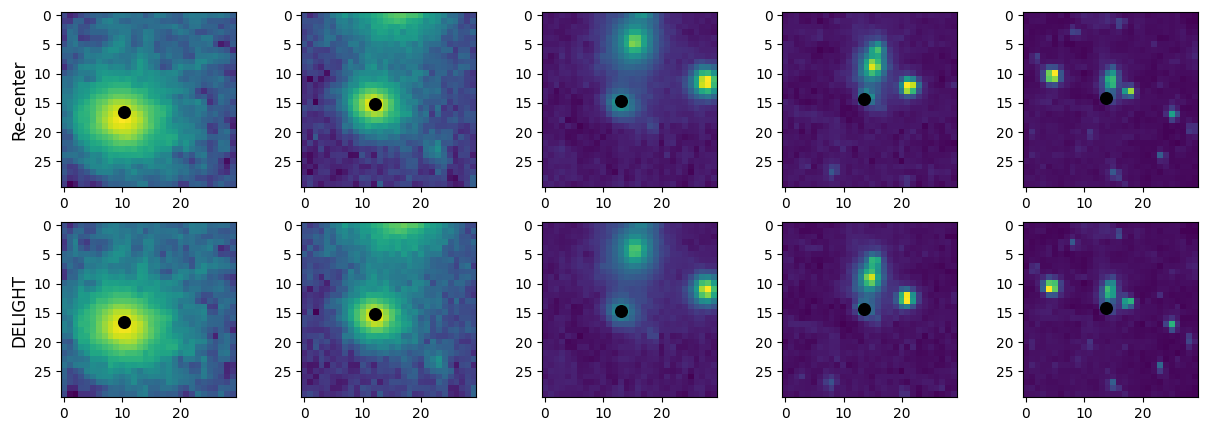

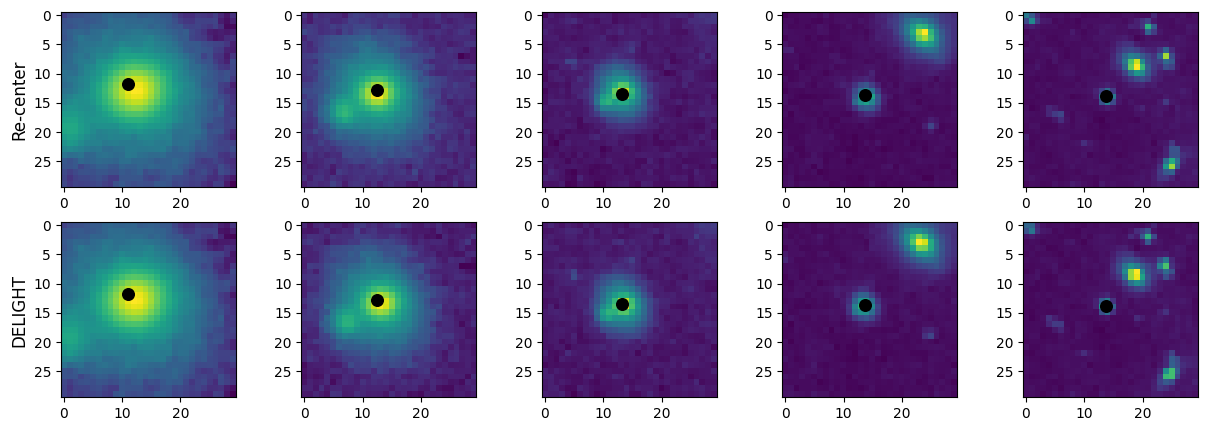

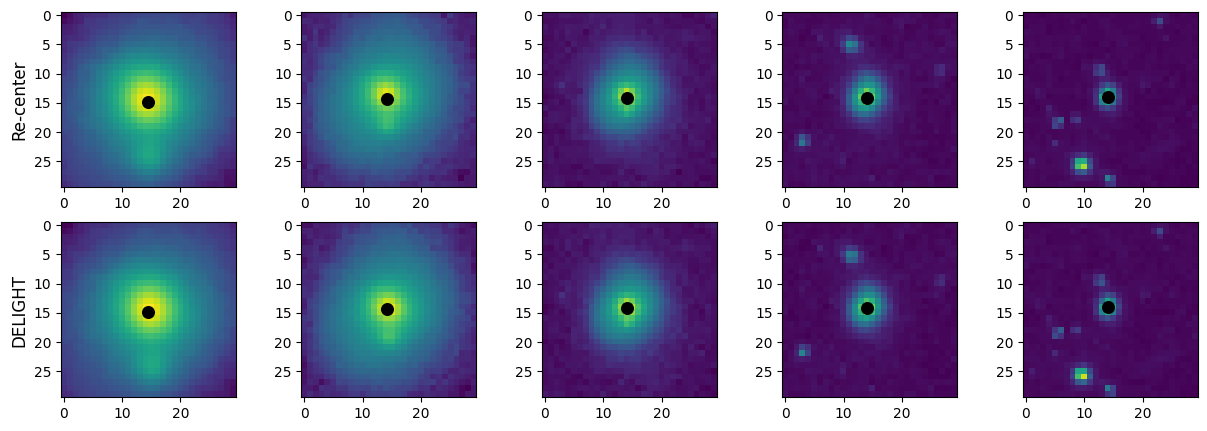

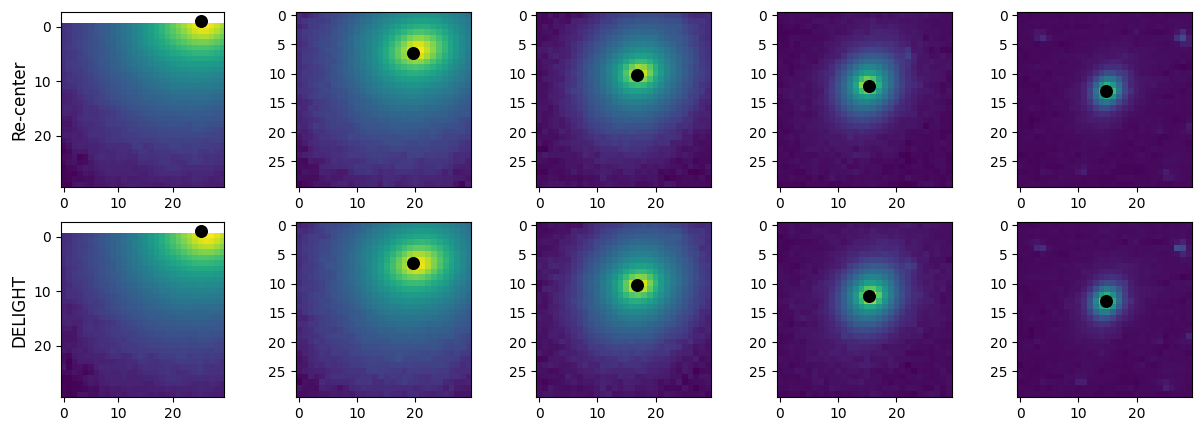

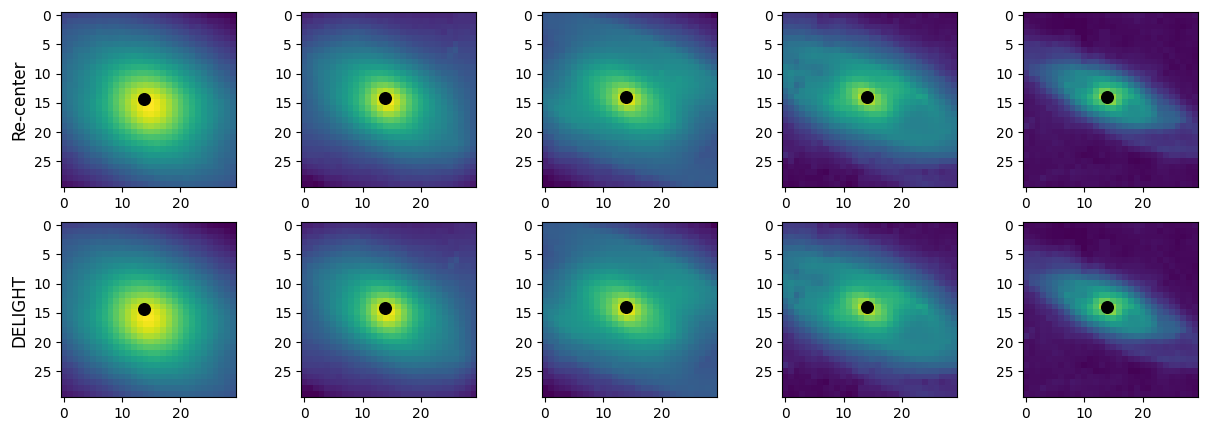

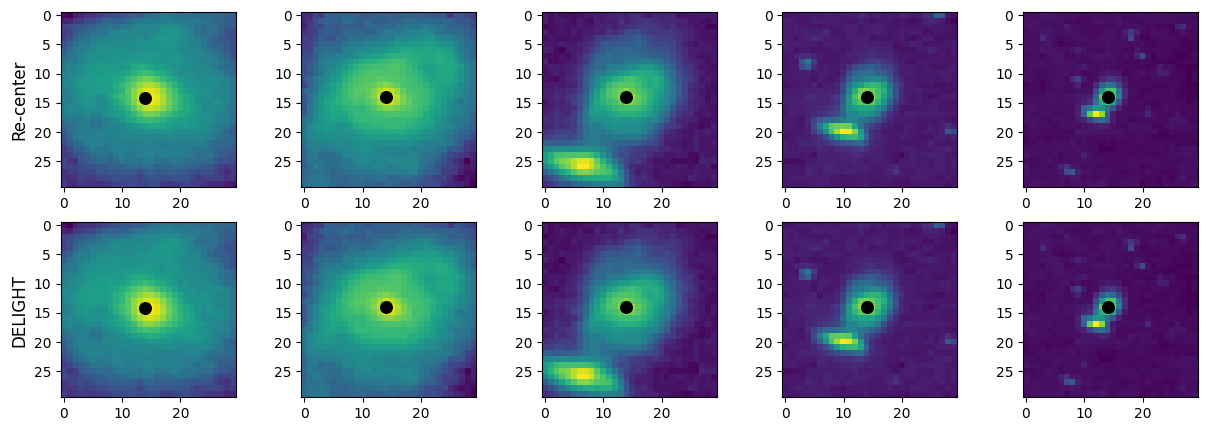

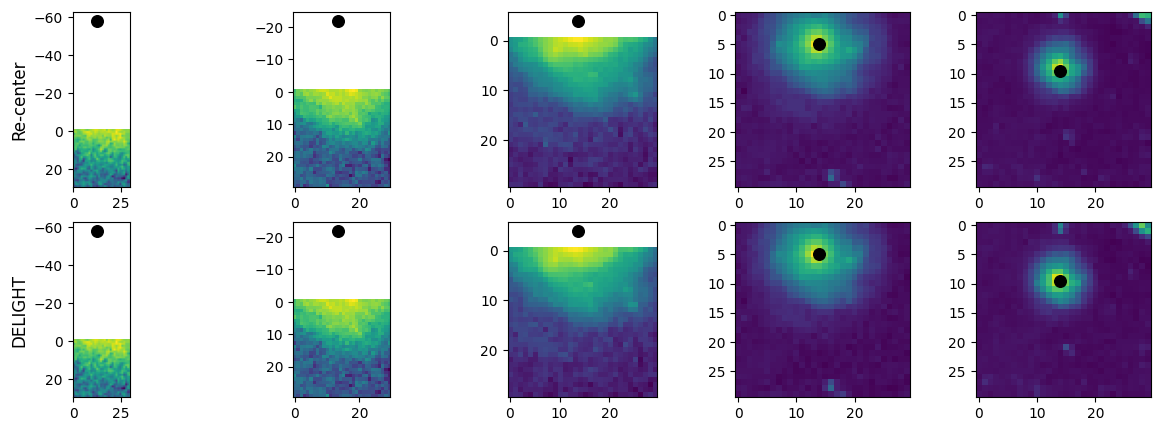

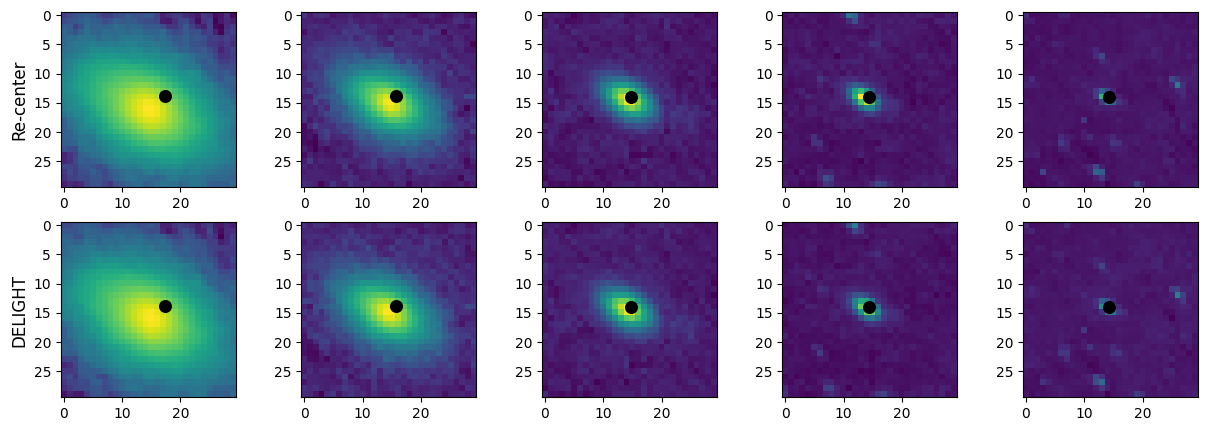

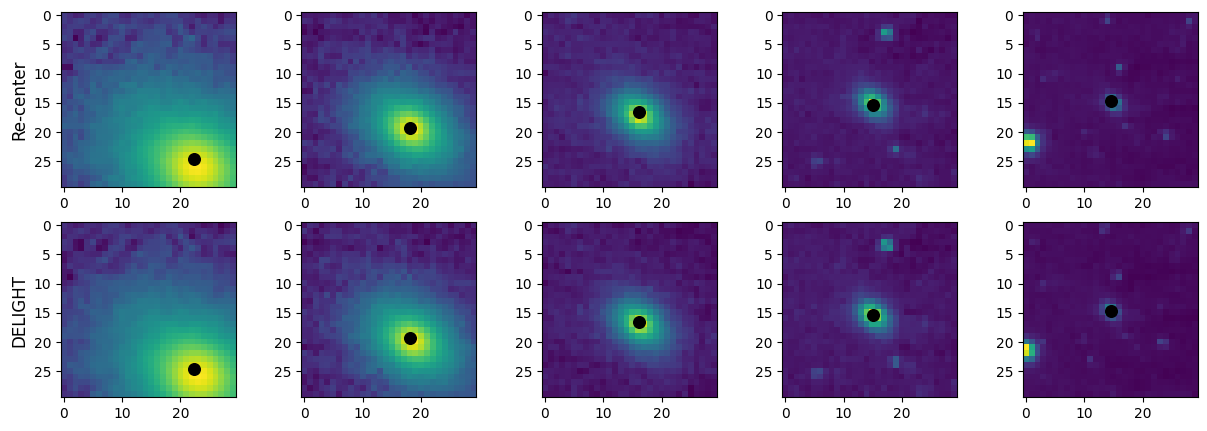

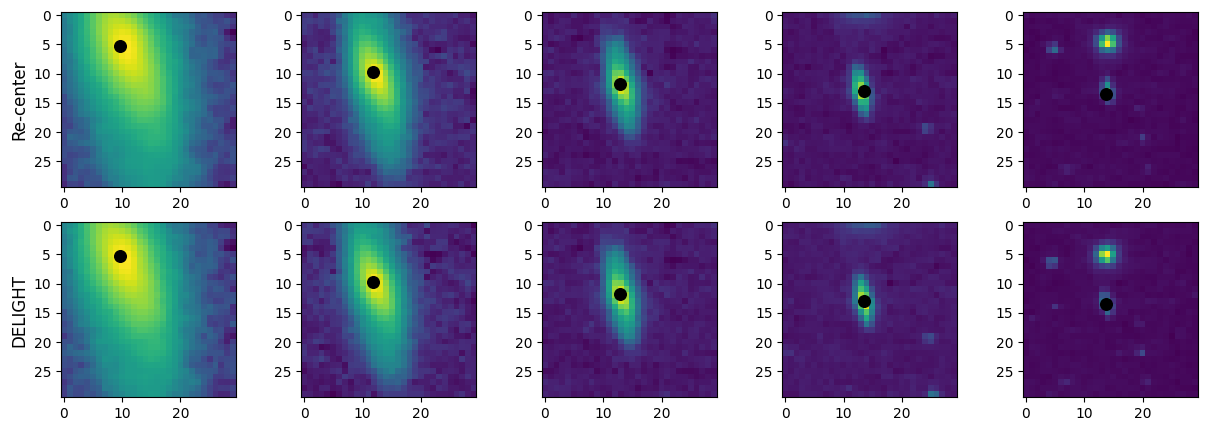

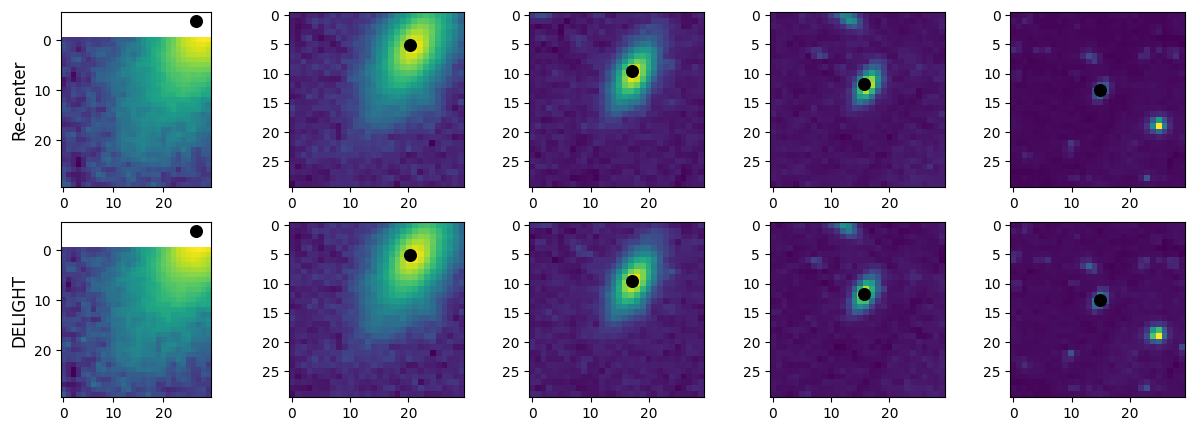

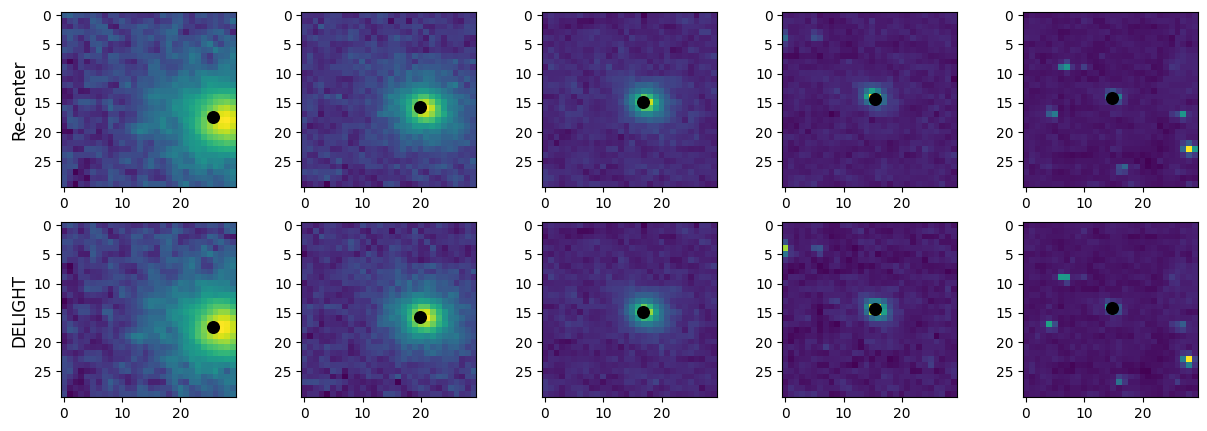

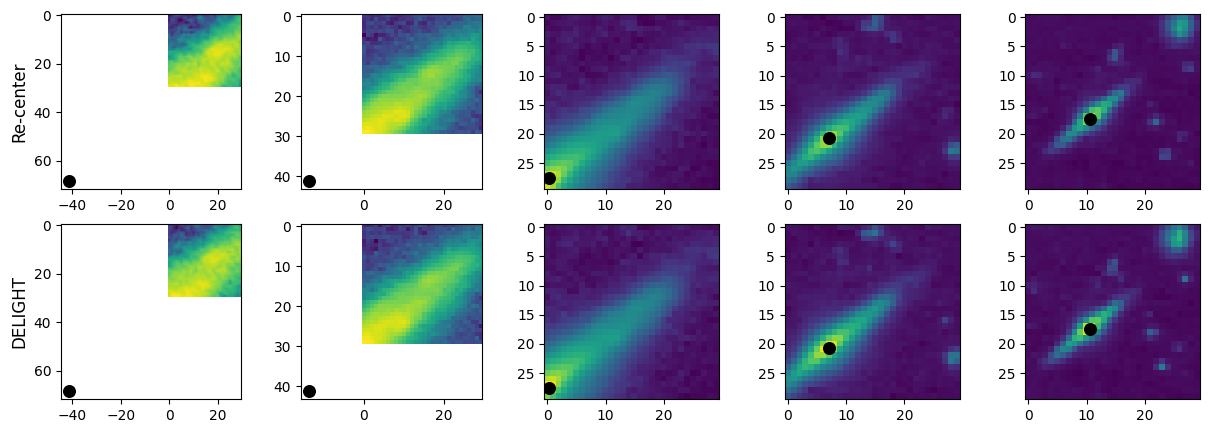

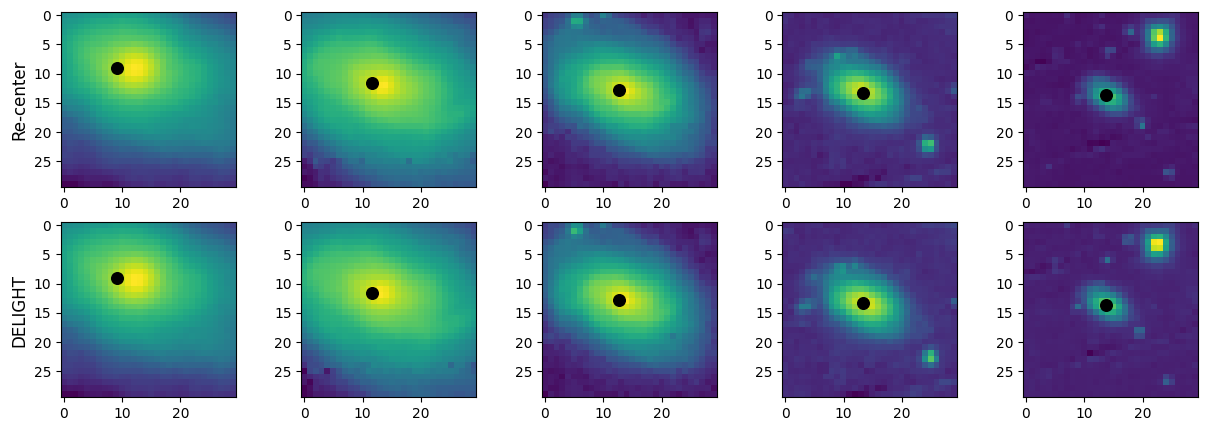

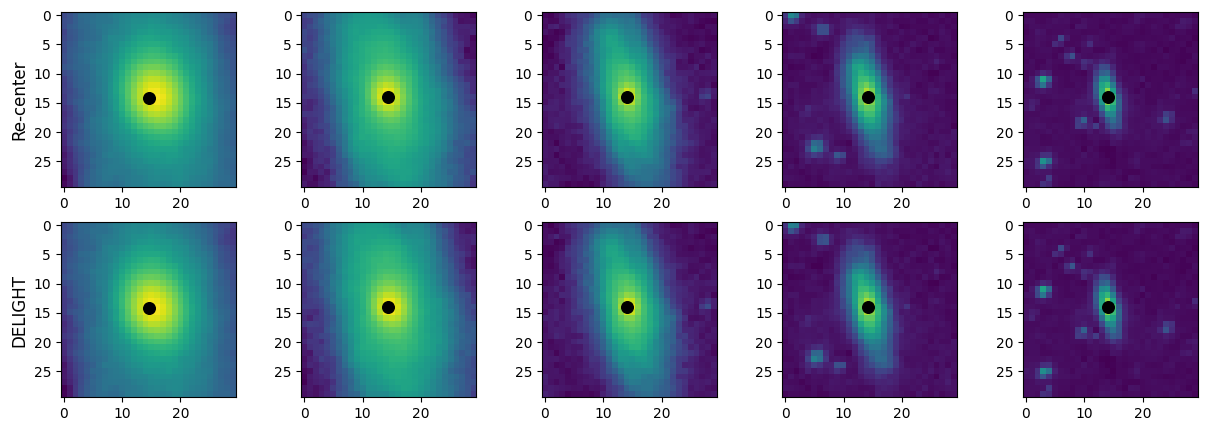

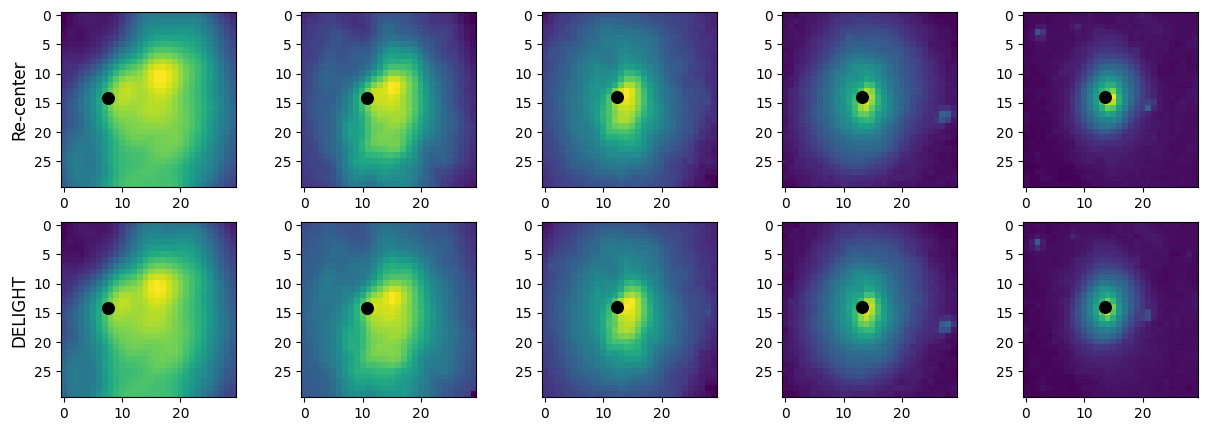

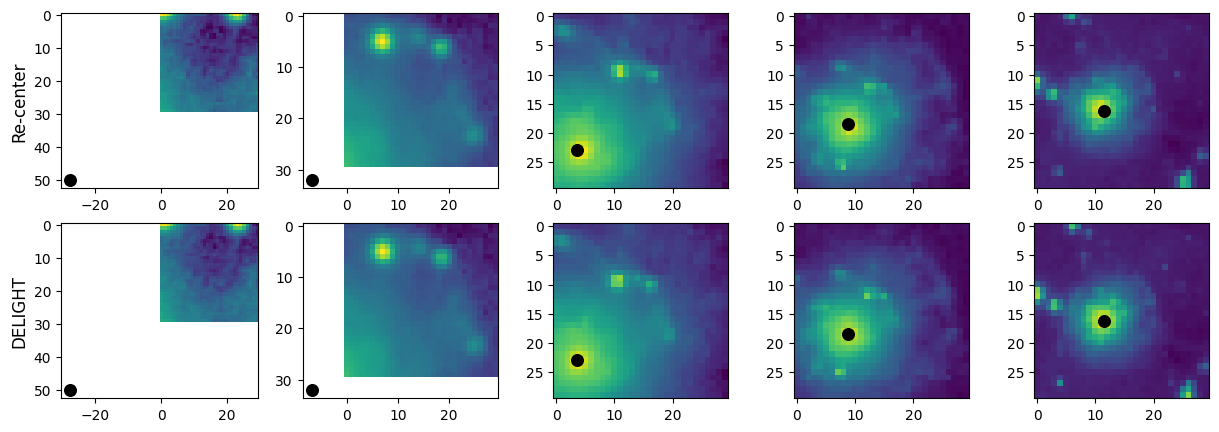

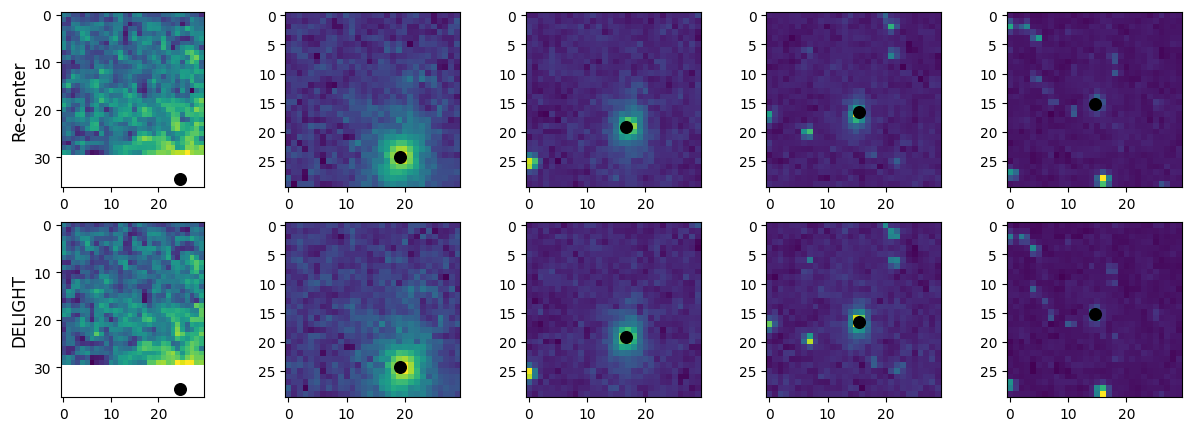

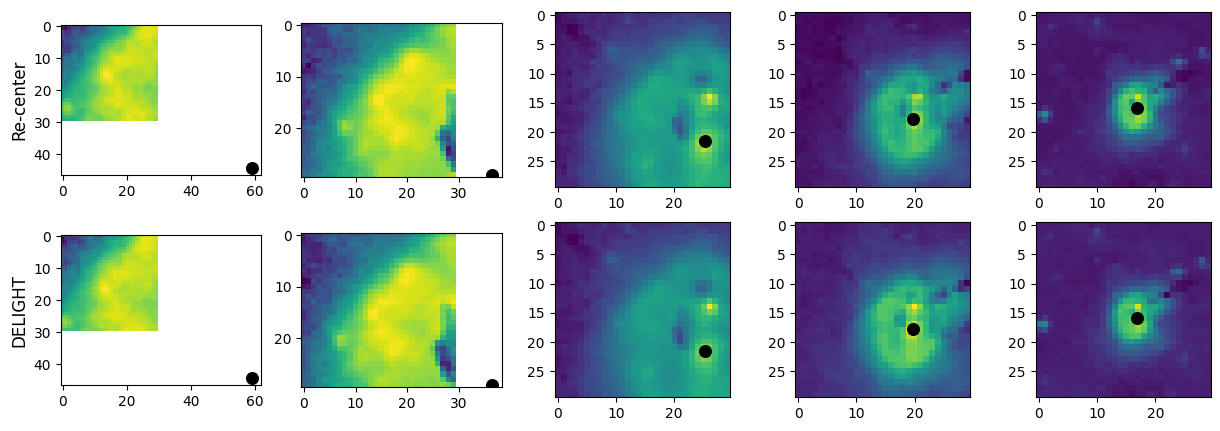

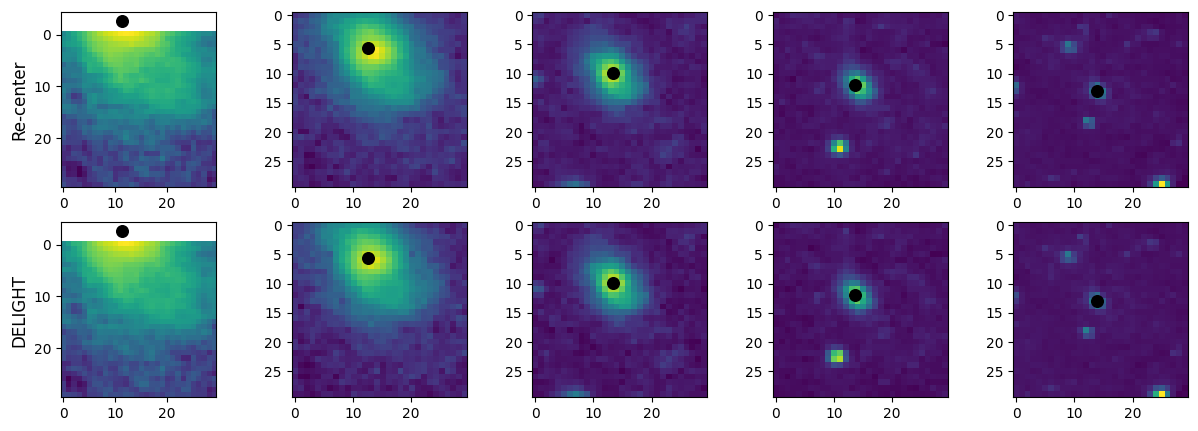

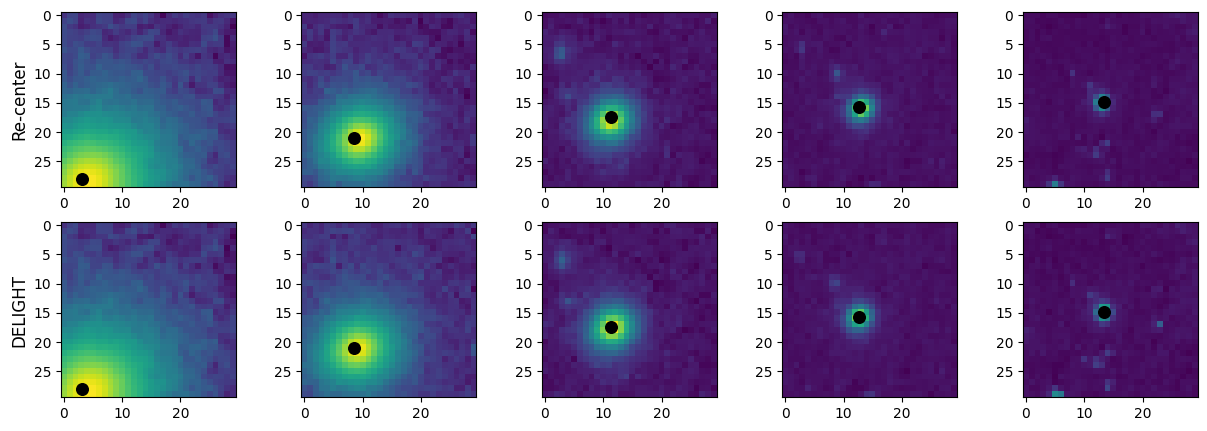

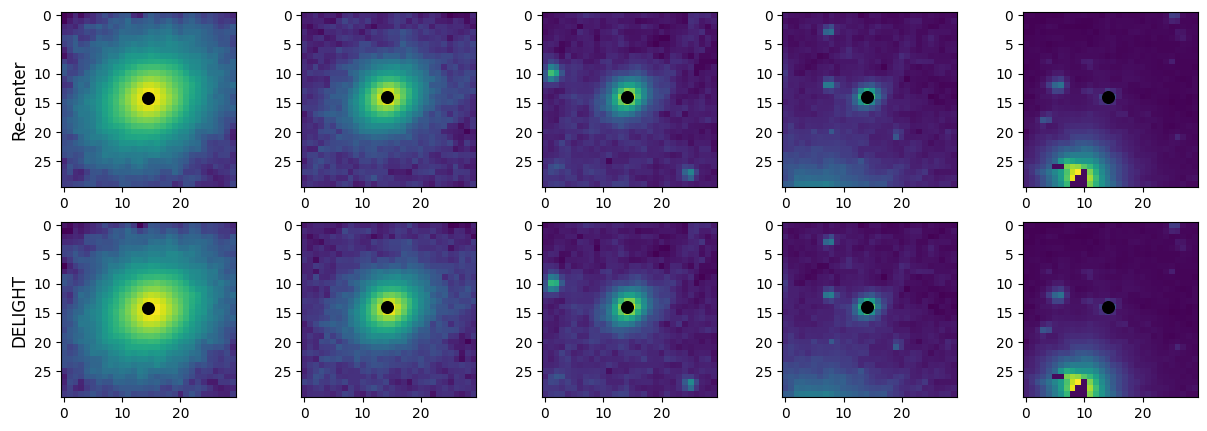

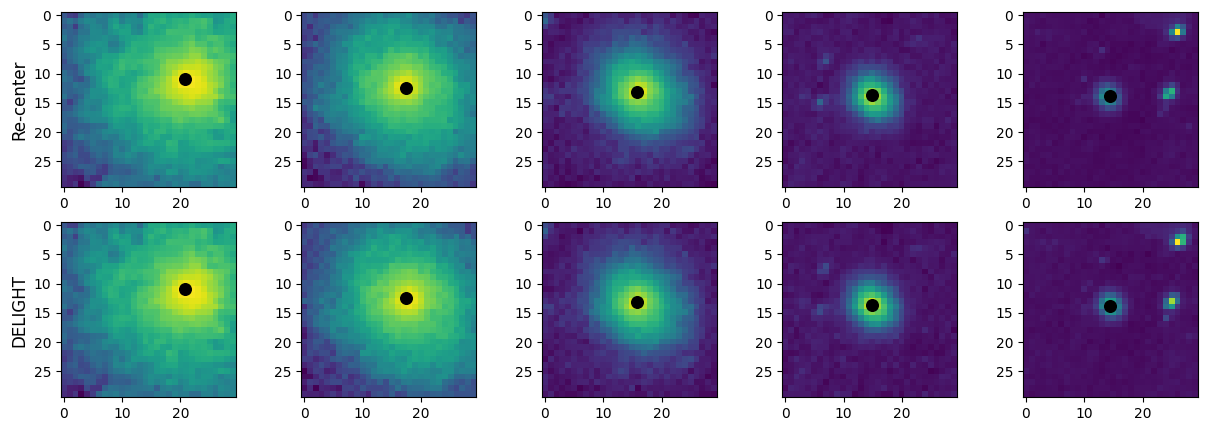

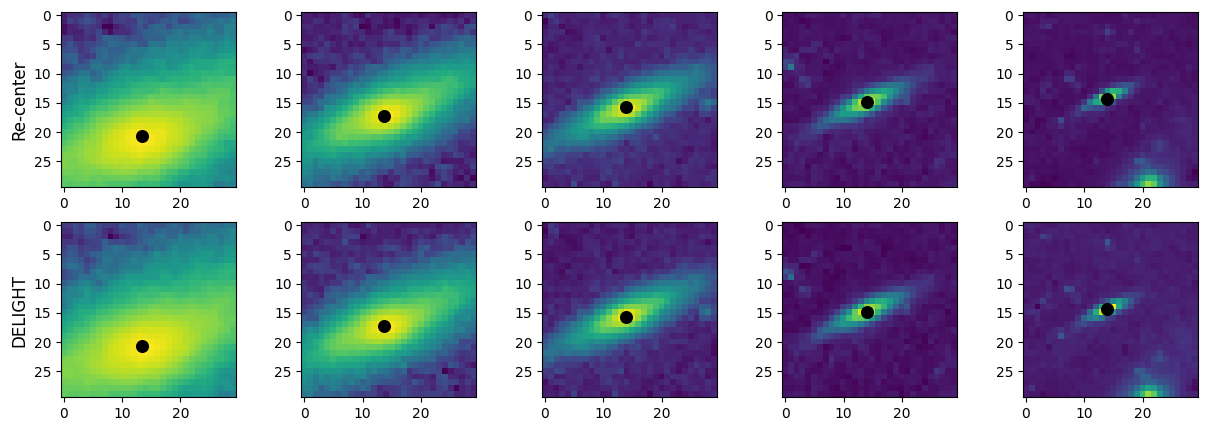

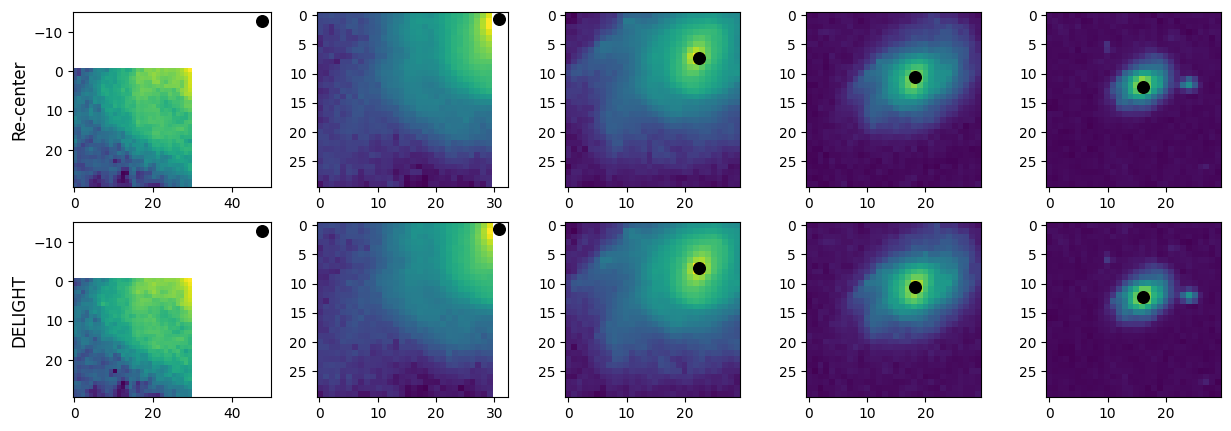

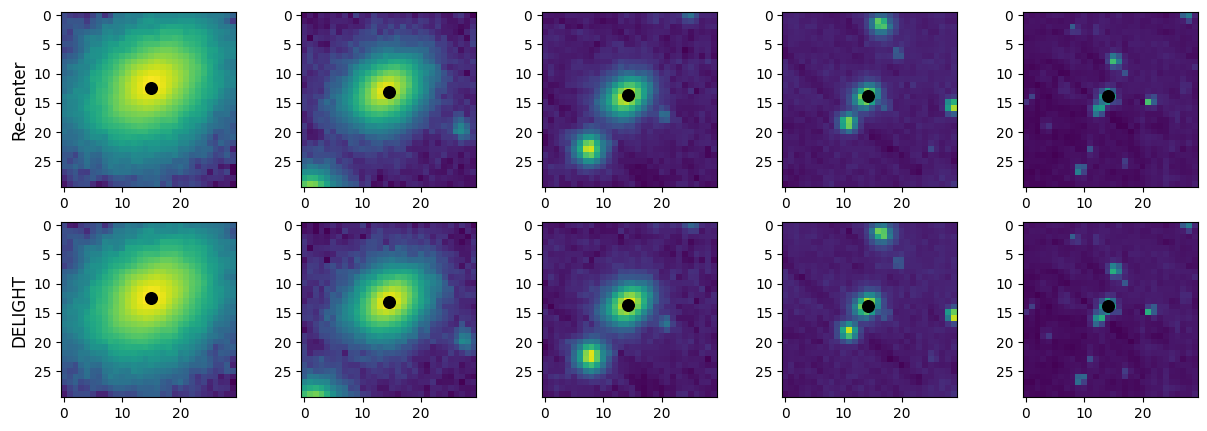

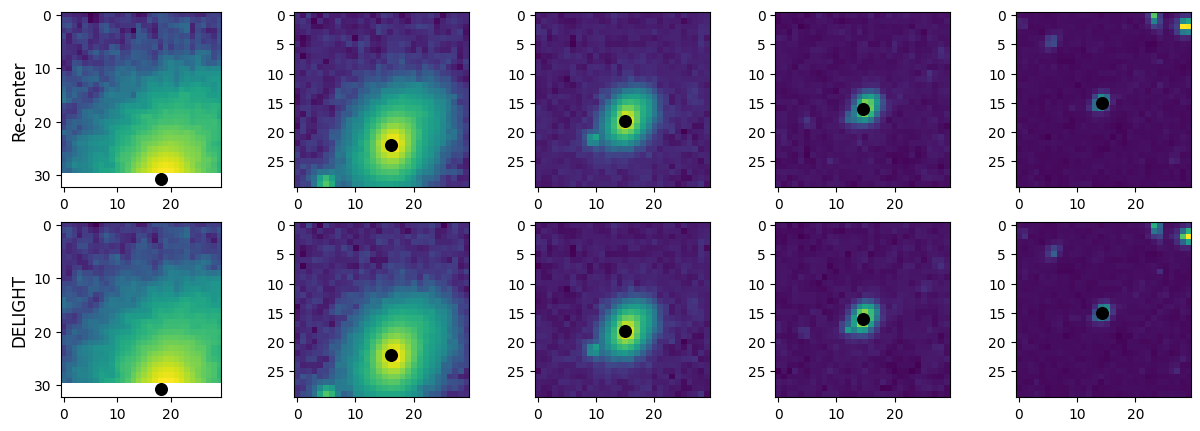

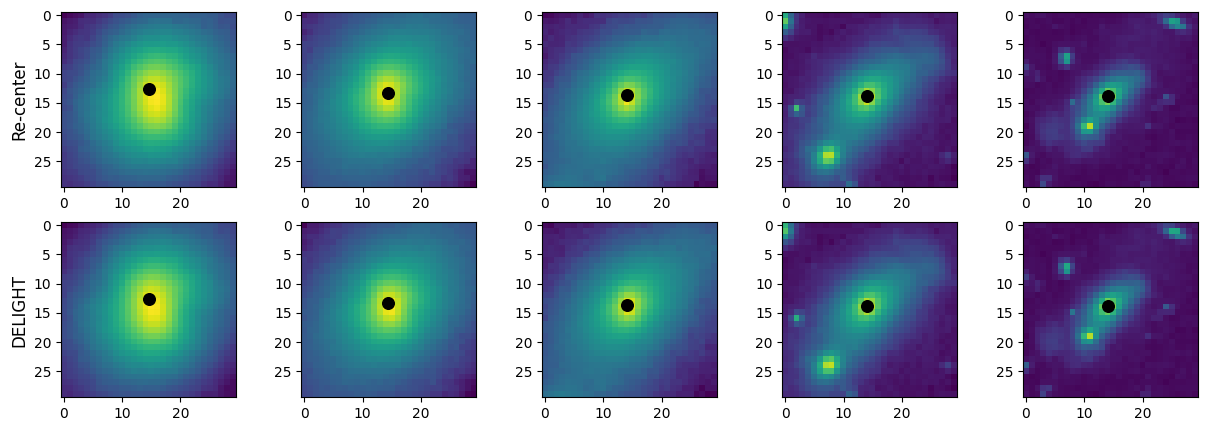

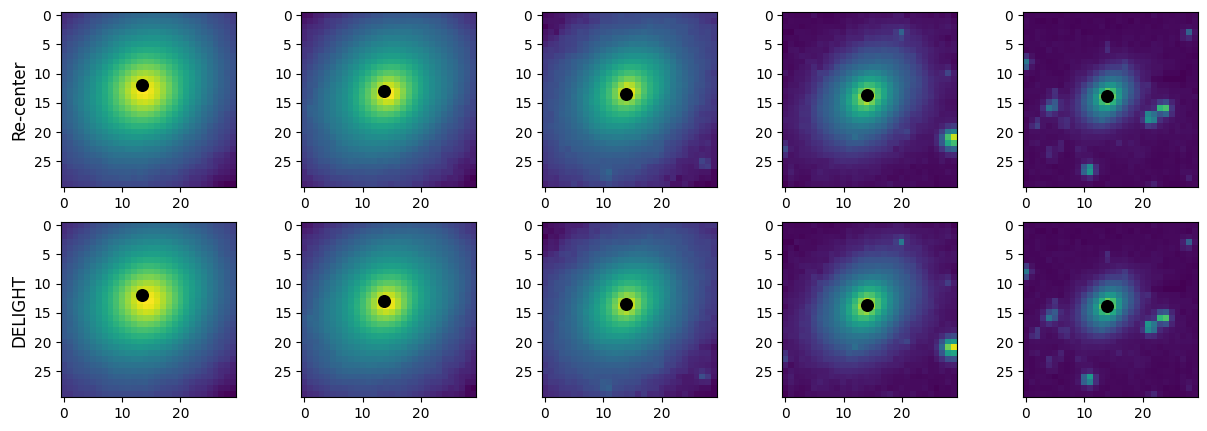

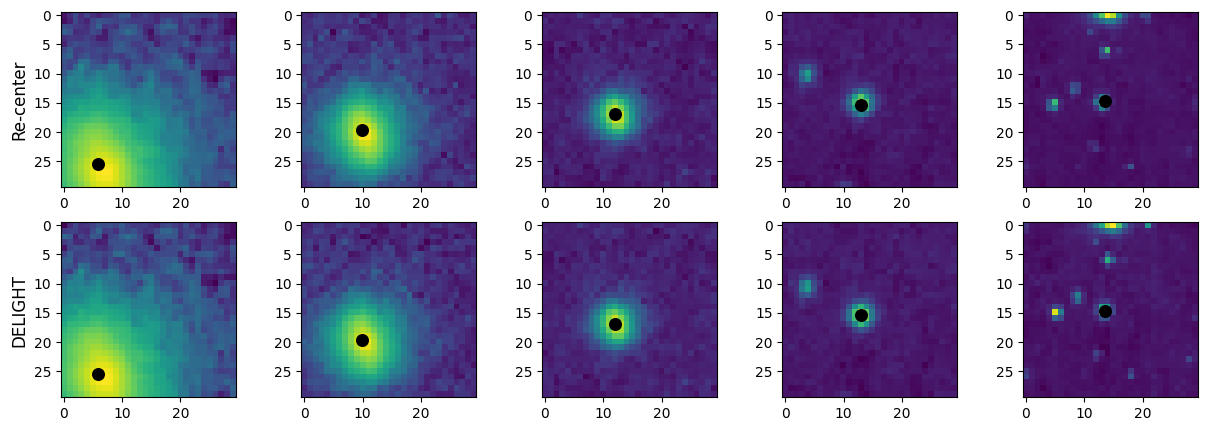

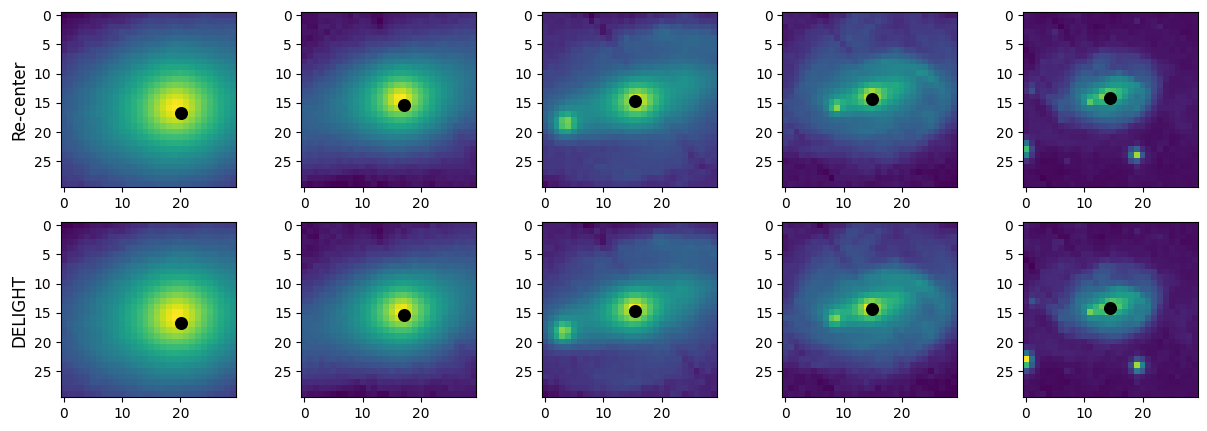

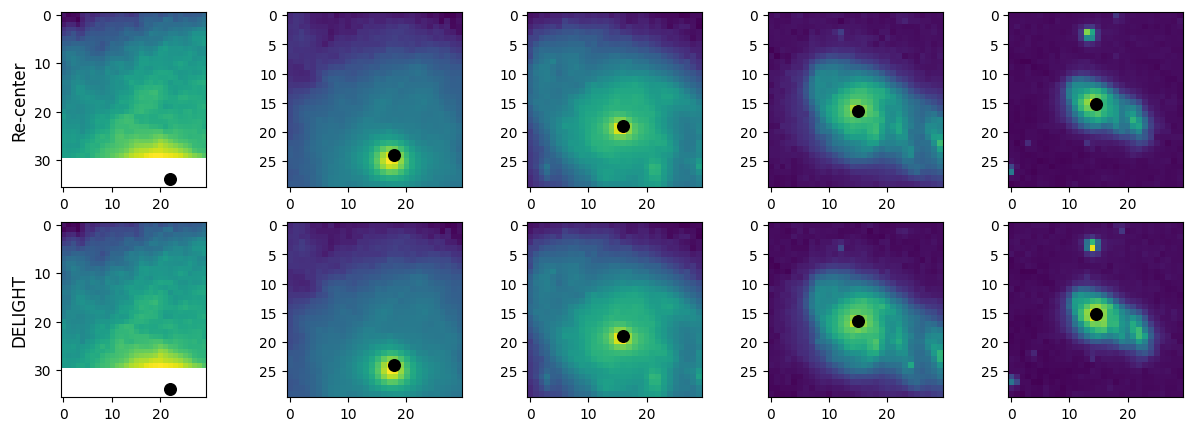

In [6]:
centros = np.array([[14,14],[14,15],[15,15],[15,14],[15,14],[14,14],[14,15],[15,15]])


for idx in range(40):

    example_recenter = dataset_recenter_delight[idx]
    example_delight = dataset_delight_h2f[idx]

    pos = 0 # Original

    fig, axs = plt.subplots(2,5, figsize=(15,5))

    for m in range(5):
        axs[0][m].imshow(example_recenter[0][pos][m][0])
        axs[0][m].scatter((example_recenter[1][pos][0]/(2**m) + centros[0][0]) , (example_recenter[1][pos][1]/(2**m)+ centros[0][0]), s=70, color="black")

        axs[1][m].imshow(example_delight[0][pos][m][0])
        axs[1][m].scatter((example_delight[1][pos][0]/(2**m) + centros[0][0]) , (example_delight[1][pos][1]/(2**m) + centros[0][0]), s=70, color="black")

    axs[0][0].set_ylabel("Re-center", fontsize=12)  # título a la izquierda
    axs[1][0].set_ylabel("DELIGHT", fontsize=12)  # título a la izquierda

    plt.show()